In [245]:
import requests
import json
import pandas as pd

In [246]:
%matplotlib inline

### Percent of COVID-19 tests positive by date,
### from Ohio CDC data.  (outliers and null rejected)

In [424]:
state='MI'

<ipython-input-425-835104559509>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['percentPositive'] = df2['percentPositive'].abs()*100


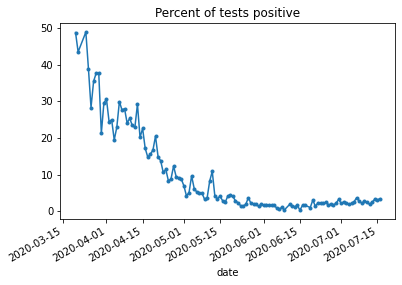

In [425]:
result = requests.get("https://covidtracking.com/api/states/daily")
data = json.loads(result.content)
df = pd.DataFrame([ d for d in data if d['state']==state])
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
df = df.set_index('date')

df['percentPositive'] =  df.positiveIncrease / df.totalTestResultsIncrease

notNullorOneorZero =  ~df['percentPositive'].isnull() & (df['percentPositive']!=1) & (df['percentPositive']!=0)
notTooBig = ~(df['percentPositive'] > .5)

df2 = df[ notNullorOneorZero & notTooBig ] 

df2['percentPositive'] = df2['percentPositive'].abs()*100
#df_percent = df2.loc[:,'percentPositive']
a1 = df2.percentPositive.plot(marker='.',title='Percent of tests positive')
a1.figure.savefig('percent',dpi=100)

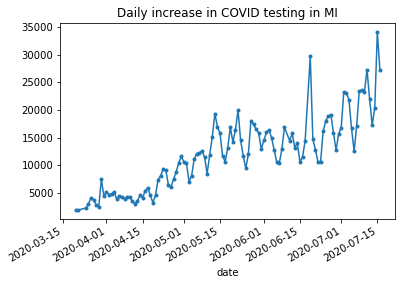

In [426]:
a2 = df2.totalTestResultsIncrease.plot(marker='.',title=f'Daily increase in COVID testing in {state}')
a2.figure.savefig('testing',dpi=100)

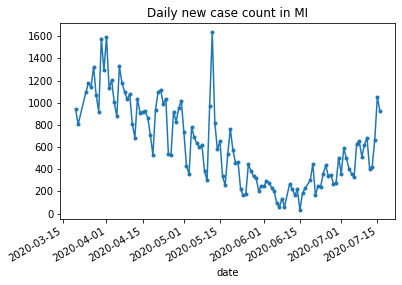

In [427]:
a3 = df2.positiveIncrease.plot(marker='.',title=f'Daily new case count in {state}')
a2.figure.savefig('new_cases',dpi=100)

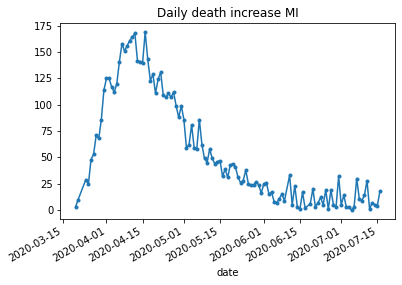

In [428]:
a4 = df2.deathIncrease.plot(marker='.',title=f'Daily death increase {state}')
a4.figure.savefig('daily_deaths',dpi=100)

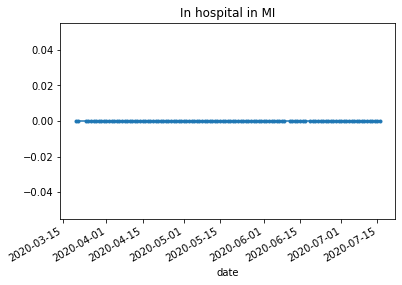

In [429]:
a4 = df2.hospitalizedIncrease.plot(marker='.',title=f'In hospital in {state}')
a4.figure.savefig('in_hospital',dpi=100)

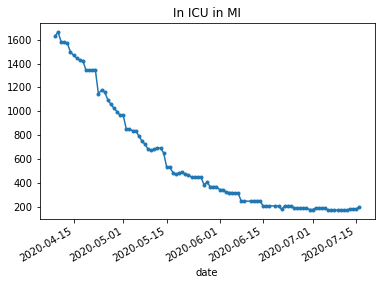

In [430]:
a4 = df2.inIcuCurrently.plot(marker='.',title=f'In ICU in {state}')
a4.figure.savefig('in_ICU',dpi=100)

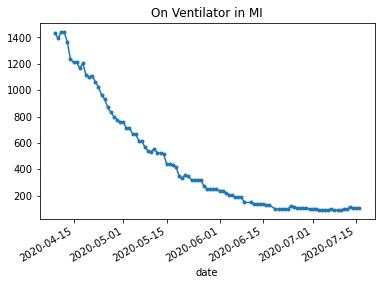

In [436]:
a4 = df2.onVentilatorCurrently.plot(marker='.',title=f'On Ventilator in {state}')
a4.figure.savefig('on Ventilator',dpi=100)

In [437]:
cols = ['totalTestResultsIncrease','positiveIncrease','percentPositive']
cols = ['percentPositive']
df3 = df2[cols]

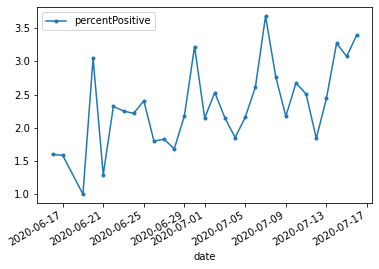

In [438]:
a6 = df3[:30].plot(marker='.')

In [439]:
df3.head(7)

,percentPositive
date,
2020-07-16,3.400037
2020-07-15,3.073272
2020-07-14,3.271281
2020-07-13,2.443261
2020-07-12,1.842691
2020-07-11,2.507596
2020-07-10,2.675039


In [434]:
df.head(10)

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,percentPositive
date,,,,,,,,,,,,,,,,,,,,,
2020-07-16,MI,79839,1315315.0,NaN,680.0,None,201.0,None,107.0,None,...,18,0,0435477032419d47e2dd119358fb7c59d5c4794d,0,0,0,0,0,,0.034000
2020-07-15,MI,78913,1289006.0,NaN,543.0,None,184.0,None,107.0,None,...,4,0,83a7d12dba2fcb3b4ef05b8b41b1fb3cabb7a3a5,0,0,0,0,0,,0.030733
2020-07-14,MI,77864,1255922.0,NaN,543.0,None,184.0,None,109.0,None,...,5,0,f4bf45b924df61ad254907ad3fe6c8977a7c86b0,0,0,0,0,0,,0.032713
2020-07-13,MI,77198,1236229.0,NaN,543.0,None,184.0,None,113.0,None,...,7,0,39a16cdd8fd6fc755b6817078346da5cf443a294,0,0,0,0,0,,0.024433
2020-07-12,MI,76776,1219379.0,NaN,505.0,None,174.0,None,99.0,None,...,1,0,bf681bca4ada7d40f4e61818391664d74c32a7aa,0,0,0,0,0,,0.018427
2020-07-11,MI,76370,1197752.0,NaN,505.0,None,174.0,None,99.0,None,...,28,0,bb5f5c2e8cfb4a779c923a731b0b6113947eb201,0,0,0,0,0,,0.025076
2020-07-10,MI,75685,1171120.0,NaN,505.0,None,174.0,None,92.0,None,...,14,0,589a26914078aefffd56486499fd82e0c2716467,0,0,0,0,0,,0.026750
2020-07-09,MI,75063,1148490.0,NaN,505.0,None,174.0,None,93.0,None,...,9,0,fb144f5060c7aa86aa539fdb5a3c44698a9ecc97,0,0,0,0,0,,0.021741
2020-07-08,MI,74551,1125452.0,NaN,505.0,None,174.0,None,93.0,None,...,11,0,def911c5a164988a4809f08b9f2d2814c960fbd2,0,0,0,0,0,,0.027712
